In [1]:
import obspy
from obspy import read, Trace,Stream
import numpy as np
import matplotlib.pyplot as plt
from obspy.geodetics.base import gps2dist_azimuth

In [2]:
src_lon,src_lat = 12,45.5
sta_lon,sta_lat=7.6950,47.3358

In [3]:
f=np.loadtxt("stat_info")
sta_longitudes=f[:,0]
sta_latitudes=f[:,1]

nbr_stations=len(sta_longitudes)

In [4]:
def ricker(f, length, dt):
    t = np.arange(-length/2, (length-dt)/2, dt)
    y = (1.0 - 2.0*(np.pi**2)*(f**2)*(t**2)) *np.exp(-(np.pi**2)*(f**2)*(t**2))
    return t, y

We compute amplitude of [ricker wavelet](https://en.wikipedia.org/wiki/Ricker_wavelet) of frequency f at time t by using following equation
\begin{equation}
A=1-2\pi^2f^2t^2e^{-\pi^2f^2t^2}
\end{equation}

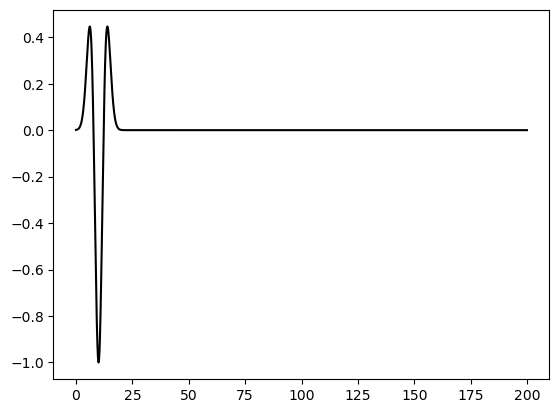

In [5]:
per=10
f=1/per
dur=200
delta=0.1
sampling_rate=1/delta
t,w=ricker(f,dur,delta)
new_data=-w
mod_data1=new_data[int(90/delta):]
mod_data2=np.concatenate((mod_data1,np.zeros(int(90/delta))), axis = 0)
data_source=Trace(header={'npts': len(mod_data2), 'delta': delta}, data=mod_data2)
time=np.arange(data_source.stats.npts)*data_source.stats.delta
plt.plot(time,data_source.data,color='k')
plt.show()

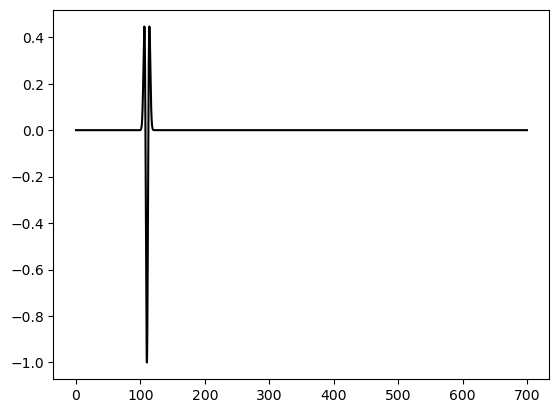

In [6]:
## Let's say this signal arrive after 100 s and let's take 700 s long time-series data
waveform_at_source=np.concatenate((np.zeros(int(100/delta)),data_source.data,np.zeros(int(400/delta))), axis = 0)
tr_at_src=Trace(header={'npts': len(waveform_at_source), 'delta': delta}, data=waveform_at_source)
time=np.arange(tr_at_src.stats.npts)*tr_at_src.stats.delta
with open("SYN_TEST_realConfiguration/SYN_source.txt","w") as sf:
    sf.write(str(src_lon)+"  "+str(src_lat)+'\n') ##station longitude and latitude
    sf.write(str(src_lon)+"  "+str(src_lat)+'\n')  ## source longitude and latitude
    for t_comp,d_comp in zip(time,tr_at_src.data):
        t_comp1=format(t_comp,'.1f')
        sf.write(str(t_comp1)+"  "+str(d_comp)+'\n')   
plt.plot(time,tr_at_src.data,color='k')
plt.show()

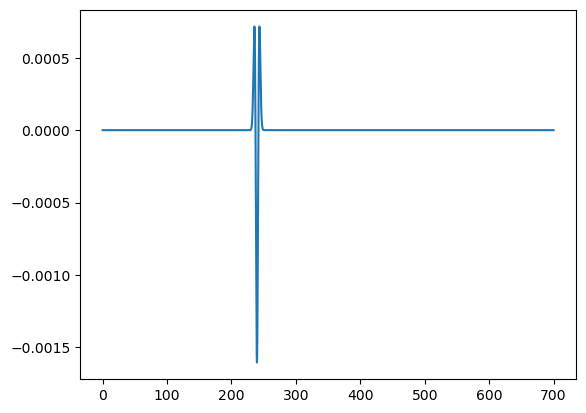

In [7]:
with open("SYN_TEST_realConfiguration/SYN_station_1.txt","w") as sdf:
    sdf.write(str(sta_lon)+"  "+str(sta_lat)+'\n')
    sdf.write(str(src_lon)+"  "+str(src_lat)+'\n')
    dist=gps2dist_azimuth(src_lat,src_lon,sta_lat,sta_lon)[0]/1000
    vel=3.0
    arrival_time=dist/vel
    data_at_sta=np.concatenate((np.zeros(int(arrival_time/delta)),tr_at_src.data/np.sqrt
                                (dist*1000)), axis = 0)
    trim_data=data_at_sta[:int(700/delta)]
    time=np.arange(len(trim_data))*delta
    plt.plot(time,trim_data)
    plt.show()
    